# XOR problem with PyTorch

In [1]:
import torch
import torch.nn as nn
from torch.optim import Adam
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data. PyTorch wants the data to be tensors
inputs = np.array([[0,0], [0,1], [1,0], [1,1]], dtype=np.float32)
inputs = torch.from_numpy(inputs)
outputs = np.array([[0], [1], [1], [0]], dtype=np.float32)
outputs = torch.from_numpy(outputs)


Linear layer means fully connected layer (dense).


In [2]:
# # ------- Create the model using Sequential.-----------
# model = nn.Sequential(
#     nn.Linear(2, 2), # input has 2 nodes, 1st hidden layer has 2 nodes
#     nn.Sigmoid(),   # activation function 1st hidden layer
#     nn.Linear(2, 1), # output layer has 1 node
#     nn.Sigmoid(),    # activation function on output layer
# )

# print(model)


In [3]:
# --------- crate model using class approach -----------
class MyModel(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()   # super(MyModel, self).__init__()
        self.hidden1 = nn.Linear(input_size, 2)
        self.act1 = nn.Sigmoid()
        self.output = nn.Linear(2, output_size)
        self.act_output = nn.Sigmoid()
 
    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act_output(self.output(x))
        return x
 
model = MyModel(inputs.shape[1], 1)
print(model)

MyModel(
  (hidden1): Linear(in_features=2, out_features=2, bias=True)
  (act1): Sigmoid()
  (output): Linear(in_features=2, out_features=1, bias=True)
  (act_output): Sigmoid()
)


In [4]:
# # inspired by: https://medium.com/analytics-vidhya/pytorch-for-deep-learning-feed-forward-neural-network-d24f5870c18
# # input -> Input layer (2) -> hidden layer l1 (2) -> output layer (1) -> output

# class net(nn.Module):
#     def __init__(self,input_size,output_size):
#         super(net,self).__init__()
#         self.l1 = nn.Linear(input_size,2)
#         self.sigmoid = nn.Sigmoid()
#         self.l_output = nn.Linear(2,output_size)

#     def forward(self, x):
#         output = self.l1(x) 
#         output = self.sigmoid(output)
#         output = self.l_output(output)
#         output = self.sigmoid(output)
#         return output

# model = net(inputs.shape[1], 1)
# print(model)

In [5]:
outputs, outputs.detach().numpy()

(tensor([[0.],
         [1.],
         [1.],
         [0.]]),
 array([[0.],
        [1.],
        [1.],
        [0.]], dtype=float32))

In [11]:
# Train model as in Tensorflow model.fit(inputs, outputs, epochs=10000, verbose=0)

loss_fn = nn.MSELoss()
optimizer = Adam(model.parameters(), lr=0.02)
epochs = 5000

train_losses = []
train_accuracies = []

for epoch in range (epochs):
    outputs_pred = model.forward(inputs) # fit model; same as model(inputs)
    train_loss = loss_fn(outputs_pred, outputs)
    train_losses.append(train_loss.item()) # .item() to extract value rather than creates a list of tensors
    
    train_accuracy = (outputs_pred.round() == outputs).float().mean()
    # train_accuracy = torch.mean((torch.round(outputs_pred) == outputs).float()) # with torch
    # train_accuracy = accuracy_score(outputs.detach().numpy(), outputs_pred.detach().numpy().round(), normalize=True) # with scikit-learn
    train_accuracies.append(train_accuracy.item())

    if epoch == 0 or (epoch+1) % 500 == 1:
        print(f"Epoch {epoch}:  training_loss is {train_loss}, accuracy is: {train_accuracy}")
    # Backward pass and optimization
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

Epoch 0:  training_loss is 1.1225839813278071e-08, accuracy is: 1.0


Epoch 500:  training_loss is 2.282923183827279e-09, accuracy is: 1.0
Epoch 1000:  training_loss is 1.2242455937894192e-09, accuracy is: 1.0
Epoch 1500:  training_loss is 8.254845140776013e-10, accuracy is: 1.0
Epoch 2000:  training_loss is 6.20967888220747e-10, accuracy is: 1.0
Epoch 2500:  training_loss is 4.932776409560802e-10, accuracy is: 1.0
Epoch 3000:  training_loss is 4.0979214466219105e-10, accuracy is: 1.0
Epoch 3500:  training_loss is 3.491855138371136e-10, accuracy is: 1.0
Epoch 4000:  training_loss is 3.03969016623995e-10, accuracy is: 1.0
Epoch 4500:  training_loss is 2.69406247310755e-10, accuracy is: 1.0


<bound method Axes.legend of <Axes: title={'center': 'Accuracy during training'}, xlabel='Epoch', ylabel='Training accuracy'>>

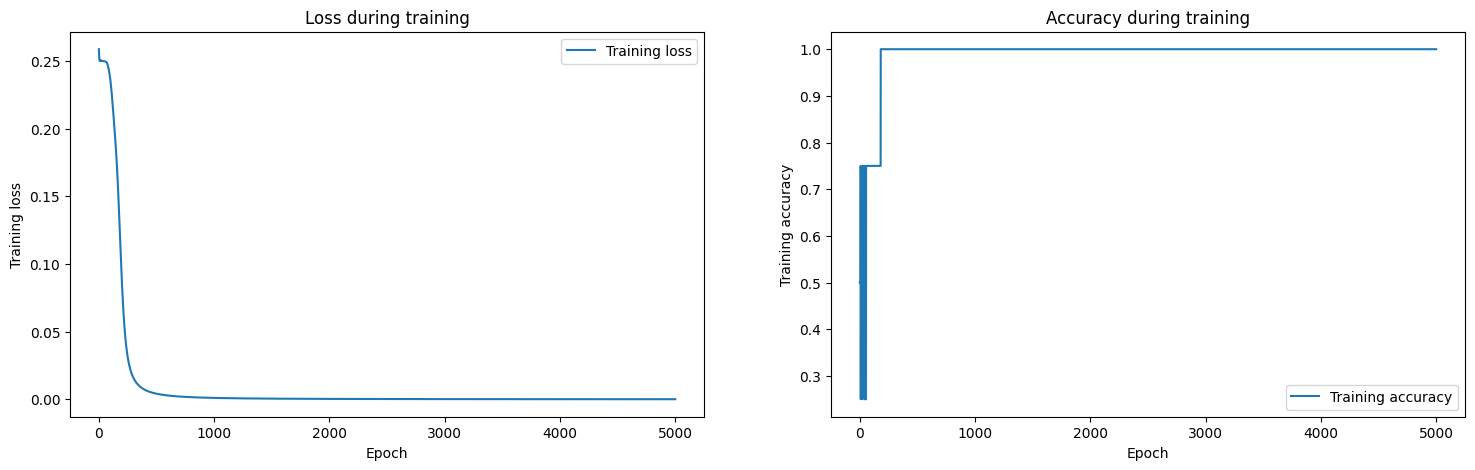

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

sns.lineplot(x=range(1, len(train_losses)+1), y=train_losses, label='Training loss', ax=ax[0])
ax[0].set(title='Loss during training', ylabel='Training loss', xlabel='Epoch')
ax[0].legend

sns.lineplot(x=range(1, len(train_accuracies)+1), y=train_accuracies, label='Training accuracy', ax=ax[1])
ax[1].set(title='Accuracy during training', ylabel='Training accuracy', xlabel='Epoch')
ax[1].legend

In [8]:
# Evaluate model as in TensorFlow loss, accuracy = model.evaluate(inputs, outputs) 

model.eval()
with torch.no_grad():
    outputs_pred = model.forward(inputs)
    train_loss = loss_fn(outputs_pred, outputs)
    train_accuracy = (outputs_pred.round() == outputs).float().mean()

print(f'Train loss is: {train_loss}, Accuracy is: {train_accuracy}')

Train loss is: 3.0369757951120846e-05, Accuracy is: 1.0


In [9]:
for i in range(len(inputs)):
    print(f'Input: {inputs[i].numpy()}, Expected: {outputs[i][0]}, Predicted: {outputs_pred[i][0]:.4f}, which is {"correct" if round(outputs_pred[i].item())==outputs[i].item() else "incorrect"}')

Input: [0. 0.], Expected: 0.0, Predicted: 0.0049, which is correct
Input: [0. 1.], Expected: 1.0, Predicted: 0.9947, which is correct
Input: [1. 0.], Expected: 1.0, Predicted: 0.9947, which is correct
Input: [1. 1.], Expected: 0.0, Predicted: 0.0065, which is correct
